In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import shutil
import math
import random
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

Download dataset to drive (first time)

In [ ]:
# os.environ[ 'KAGGLE_CONFIG_DIR']= "/content/drive/MyDrive/kaggle_dataset"

# %cd /content/drive/MyDrive/kaggle_dataset

# !kaggle datasets download -d l3llff/flowers

Preparing dataset folders (every session)

In [ ]:
ORIGINAL_DATA_DIR = "/content/flowers"
TrainDataDir="/content/flowers_splited/Training"
TestDataDir="/content/flowers_splited/Testing"

%cp /content/drive/MyDrive/kaggle_dataset/flowers.zip /content

%cd /content
!unzip flowers.zip
%mv /content/flowers /content/flowers_splited
!unzip flowers.zip

%cd /content/
%mkdir Training
%mkdir Testing

%mv  -v /content/flowers_splited/* /content/Training

%cd /content/flowers_splited

%mv  -v /content/Training /content/flowers_splited
%mv  -v /content/Testing /content/flowers_splited



flowers_folders_names = os.listdir(TrainDataDir)
number_of_flowers_in_every_folder = []

i = 0

for j in range(len(flowers_folders_names)):
  flowers_images_names_in_one_folder =  os.listdir(TrainDataDir+'/'+flowers_folders_names[j])
  number_of_flowers_in_every_folder.append(len(flowers_images_names_in_one_folder))
  os.mkdir(TestDataDir+'/'+flowers_folders_names[j])
  for k in range(math.ceil(number_of_flowers_in_every_folder[j] * 0.10)):
      shutil.move(TrainDataDir+'/'+flowers_folders_names[j]+'/'+flowers_images_names_in_one_folder[k], TestDataDir+'/'+flowers_folders_names[j])


Streaming output truncated to the last 5000 lines.
  inflating: flowers/magnolia/2417829822_e4041c7564_c.jpg  
  inflating: flowers/magnolia/2420386044_00cecd7b65_c.jpg  
  inflating: flowers/magnolia/2420392482_6942bbf11b_c.jpg  
  inflating: flowers/magnolia/2420395114_d1e376c850_c.jpg  
  inflating: flowers/magnolia/2421451765_70780d6326_c.jpg  
  inflating: flowers/magnolia/2423949635_f5e1430ff6_c.jpg  
  inflating: flowers/magnolia/2425675697_f780d50d87_c.jpg  
  inflating: flowers/magnolia/24304195644_4b12a2cc52_c.jpg  
  inflating: flowers/magnolia/2437895393_228471fb34_c.jpg  
  inflating: flowers/magnolia/2445138707_9f5b1bdc27_c.jpg  
  inflating: flowers/magnolia/24453712144_7bca06209b_c.jpg  
  inflating: flowers/magnolia/24528246886_064ecba8f4_c.jpg  
  inflating: flowers/magnolia/2454321261_87e2ac1dc3_c.jpg  
  inflating: flowers/magnolia/2462948238_970872438c_c.jpg  
  inflating: flowers/magnolia/2464265664_8b5e155d77_c.jpg  
  inflating: flowers/magnolia/2466117909_f4f27

In [ ]:
classnames=os.listdir(ORIGINAL_DATA_DIR)

number_of_images_Orignal=[]

for classname in classnames:
  number_of_images_Orignal.append(len(os.listdir(ORIGINAL_DATA_DIR+'/'+classname)))

print("ORIGINAL_DATASET:\n")
print("Number of classes: "+str(len(classnames))+"\n")

print("CLASSES INFO:")
for i in range(len(classnames)):
  print("Class #"+"{:<5}".format(i) + "(Number Of Images: "+"{:<4}".format(number_of_images_Orignal[i])+" ) \t Name : " + classnames[i])

ORIGINAL_DATASET:

Number of classes: 16

CLASSES INFO:
Class #0    (Number Of Images: 1027 ) 	 Name : sunflower
Class #1    (Number Of Images: 982  ) 	 Name : water_lily
Class #2    (Number Of Images: 1022 ) 	 Name : california_poppy
Class #3    (Number Of Images: 1000 ) 	 Name : black_eyed_susan
Class #4    (Number Of Images: 923  ) 	 Name : carnation
Class #5    (Number Of Images: 737  ) 	 Name : astilbe
Class #6    (Number Of Images: 873  ) 	 Name : bellflower
Class #7    (Number Of Images: 980  ) 	 Name : common_daisy
Class #8    (Number Of Images: 1052 ) 	 Name : dandelion
Class #9    (Number Of Images: 999  ) 	 Name : rose
Class #10   (Number Of Images: 978  ) 	 Name : calendula
Class #11   (Number Of Images: 1048 ) 	 Name : magnolia
Class #12   (Number Of Images: 1048 ) 	 Name : tulip
Class #13   (Number Of Images: 970  ) 	 Name : daffodil
Class #14   (Number Of Images: 1054 ) 	 Name : iris
Class #15   (Number Of Images: 1047 ) 	 Name : coreopsis


In [ ]:
number_of_images=[]

for classname in classnames:
  number_of_images.append(len(os.listdir(TrainDataDir+'/'+classname)))

print("Training_DATASET:\n")
print("Number of classes: "+str(len(classnames))+"\n")

print("CLASSES INFO:")
for i in range(len(classnames)):
  print("Class #"+"{:<5}".format(i) + "(Number Of Images: "+"{:<4}".format(number_of_images[i])+"/"+"{:<4}".format(number_of_images_Orignal[i])+" ) \t Name : " + classnames[i])

Training_DATASET:

Number of classes: 16

CLASSES INFO:
Class #0    (Number Of Images: 924 /1027 ) 	 Name : sunflower
Class #1    (Number Of Images: 883 /982  ) 	 Name : water_lily
Class #2    (Number Of Images: 919 /1022 ) 	 Name : california_poppy
Class #3    (Number Of Images: 900 /1000 ) 	 Name : black_eyed_susan
Class #4    (Number Of Images: 830 /923  ) 	 Name : carnation
Class #5    (Number Of Images: 663 /737  ) 	 Name : astilbe
Class #6    (Number Of Images: 785 /873  ) 	 Name : bellflower
Class #7    (Number Of Images: 882 /980  ) 	 Name : common_daisy
Class #8    (Number Of Images: 946 /1052 ) 	 Name : dandelion
Class #9    (Number Of Images: 899 /999  ) 	 Name : rose
Class #10   (Number Of Images: 880 /978  ) 	 Name : calendula
Class #11   (Number Of Images: 943 /1048 ) 	 Name : magnolia
Class #12   (Number Of Images: 943 /1048 ) 	 Name : tulip
Class #13   (Number Of Images: 873 /970  ) 	 Name : daffodil
Class #14   (Number Of Images: 948 /1054 ) 	 Name : iris
Class #15   (

In [ ]:
number_of_images=[]

for classname in classnames:
  number_of_images.append(len(os.listdir(TestDataDir+'/'+classname)))

print("Testing_DATASET:\n")
print("Number of classes: "+str(len(classnames))+"\n")

print("CLASSES INFO:")
for i in range(len(classnames)):
  print("Class #"+"{:<5}".format(i) + "(Number Of Images: "+"{:<4}".format(number_of_images[i])+"/"+"{:<4}".format(number_of_images_Orignal[i])+" ) \t Name : " + classnames[i])

Testing_DATASET:

Number of classes: 16

CLASSES INFO:
Class #0    (Number Of Images: 103 /1027 ) 	 Name : sunflower
Class #1    (Number Of Images: 99  /982  ) 	 Name : water_lily
Class #2    (Number Of Images: 103 /1022 ) 	 Name : california_poppy
Class #3    (Number Of Images: 100 /1000 ) 	 Name : black_eyed_susan
Class #4    (Number Of Images: 93  /923  ) 	 Name : carnation
Class #5    (Number Of Images: 74  /737  ) 	 Name : astilbe
Class #6    (Number Of Images: 88  /873  ) 	 Name : bellflower
Class #7    (Number Of Images: 98  /980  ) 	 Name : common_daisy
Class #8    (Number Of Images: 106 /1052 ) 	 Name : dandelion
Class #9    (Number Of Images: 100 /999  ) 	 Name : rose
Class #10   (Number Of Images: 98  /978  ) 	 Name : calendula
Class #11   (Number Of Images: 105 /1048 ) 	 Name : magnolia
Class #12   (Number Of Images: 105 /1048 ) 	 Name : tulip
Class #13   (Number Of Images: 97  /970  ) 	 Name : daffodil
Class #14   (Number Of Images: 106 /1054 ) 	 Name : iris
Class #15   (N

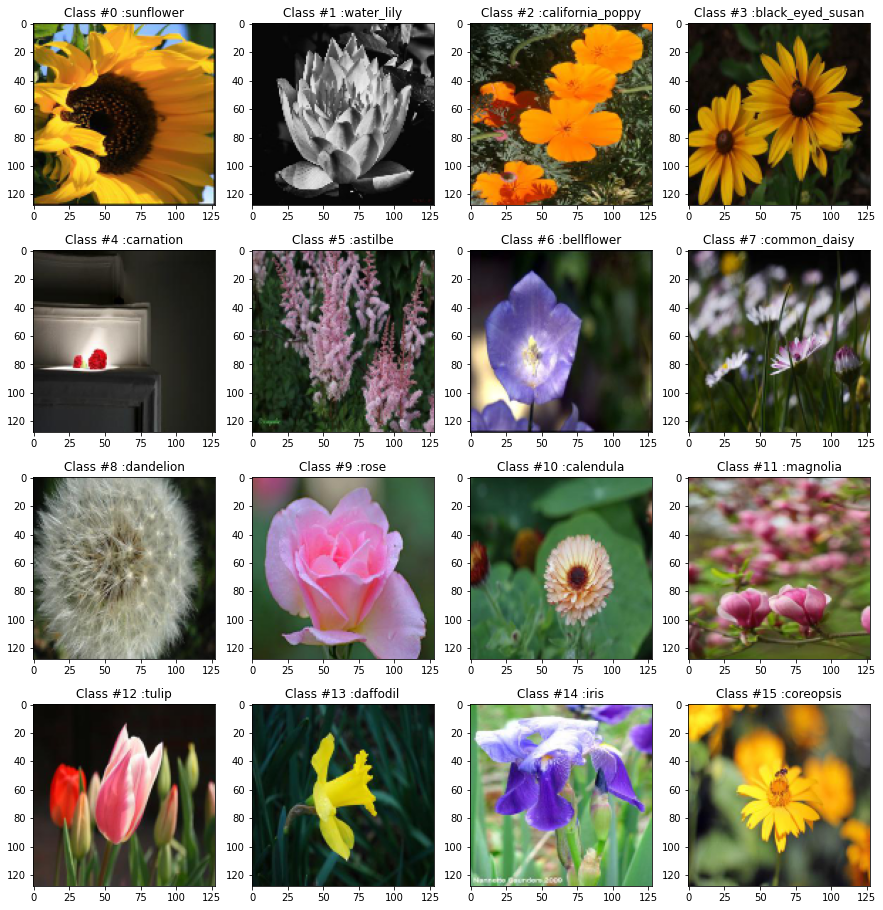

In [ ]:
rows ,cols = 4, 4
figure = plt.figure(figsize=(15, 16))
i = 0 
for classname in classnames:
  img_index = random.randint(0, len(os.listdir(TrainDataDir+'/'+classname)))
  folwer_path = TrainDataDir+'/'+classname+'/'+os.listdir(TrainDataDir+'/'+classname)[img_index]
  flower_img = mpimg.imread(folwer_path)
  flower_img = cv2.resize(flower_img,(128,128))
  figure.add_subplot(rows, cols, i + 1)
  plt.imshow(flower_img)
  plt.title("Class #"+str(i)+" :"+classname)
  i+=1

In [ ]:
#THE ORIGINAL IMAGE SIZE IS 256 * 256

IMG_SIZE=128

# train_augmentation=ImageDataGenerator(rescale=1./255,validation_split=0.2)
    
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  TrainDataDir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(IMG_SIZE, IMG_SIZE),
  color_mode="rgb")

# train_ds = train_augmentation.flow_from_directory(
#   TrainDataDir,
#   subset="training",
#   target_size=(IMG_SIZE, IMG_SIZE),
#   color_mode='rgb',
#   class_mode='categorical')

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  TrainDataDir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(IMG_SIZE, IMG_SIZE),
  color_mode="rgb")

# val_ds= train_augmentation.flow_from_directory(
#   TrainDataDir,
#   subset="validation",
#   target_size=(IMG_SIZE, IMG_SIZE),
#   color_mode='rgb',
#   class_mode='categorical')

Found 14160 files belonging to 16 classes.
Using 11328 files for training.
Found 14160 files belonging to 16 classes.
Using 2832 files for validation.


In [ ]:
# flower_types = os.listdir(TestDataDir)

# images = []
# lables = []


# for flower_type in flower_types:
#   flowers_of_one_type = os.listdir(TestDataDir+'/'+flower_type)
#   for flower in flowers_of_one_type:
#       img = cv2.imread(TestDataDir+'/'+flower_type+'/'+flower,cv2.IMREAD_COLOR)
#       img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
#       images.append(img)
#       lables.append(flower_type)

# images = np.array(images)
# images = images /255

# y = pd.DataFrame(data = lables,columns=['lables'])
# y = pd.get_dummies(y)
# y=np.array(y)

# X_test = images
# y_test = y
# print(X_test.shape)
# print(y_test.shape)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
  TestDataDir,
  label_mode='categorical',
  image_size=(IMG_SIZE, IMG_SIZE),
  color_mode="rgb")

Found 1580 files belonging to 16 classes.


## Before Optmization

In [ ]:
model = Sequential()

resnet50_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(IMG_SIZE,IMG_SIZE,3),
                   pooling='max',classes=len(classnames),
                   weights='imagenet')

for layer in resnet50_model.layers:
        layer.trainable=False


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model.add(resnet50_model)
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
Total params: 23,653,808
Trainable params: 66,096
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

model_history = model.fit(train_ds, validation_data=val_ds, epochs=4)

Epoch 1/4
354/354 [==============================] - 751s 2s/step - loss: 1.6132 - accuracy: 0.5378 - val_loss: 1.0993 - val_accuracy: 0.7016
Epoch 2/4
354/354 [==============================] - 751s 2s/step - loss: 0.9010 - accuracy: 0.7485 - val_loss: 0.8523 - val_accuracy: 0.7401
Epoch 3/4
354/354 [==============================] - 735s 2s/step - loss: 0.6975 - accuracy: 0.7925 - val_loss: 0.7490 - val_accuracy: 0.7617
Epoch 4/4
354/354 [==============================] - 736s 2s/step - loss: 0.5927 - accuracy: 0.8247 - val_loss: 0.6521 - val_accuracy: 0.7987


In [ ]:
model.save("/content/drive/MyDrive/Models/model1-2.h5")

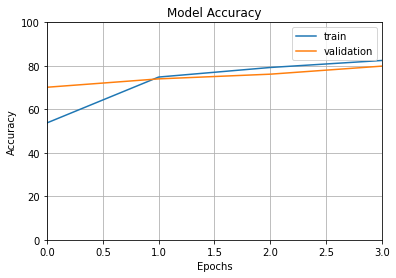

In [ ]:
fig1 = plt.gcf()
accuracy =model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

accuracy = [i*100 for i in accuracy]
val_accuracy = [i*100 for i in val_accuracy]

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.axis(ymin=0,ymax=100)
plt.axis(xmin=0,xmax=len(accuracy))
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# model = load_model('/content/drive/MyDrive/Models/model1-1.h5')

In [ ]:
results = model.evaluate(test_data)
print("Test Accuracy:", results[1])

50/50 [==============================] - 83s 2s/step - loss: 0.6398 - accuracy: 0.8025
Test Accuracy: 0.8025316596031189


## After Optmization

loading the Saved model

In [ ]:
# resnet_model = load_model('/content/drive/MyDrive/Models/model1-1.h5')

define and train new model

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(IMG_SIZE,IMG_SIZE,3),
                   pooling='avg',classes=len(classnames),
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False


In [ ]:
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(160, activation='relu'))
resnet_model.add(Dense(16, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                65568     
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
Total params: 23,653,808
Trainable params: 66,096
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

resnet_model_history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=6)

Epoch 1/6
354/354 [==============================] - 758s 2s/step - loss: 0.8070 - accuracy: 0.7500 - val_loss: 0.6490 - val_accuracy: 0.7963
Epoch 2/6
354/354 [==============================] - 752s 2s/step - loss: 0.3789 - accuracy: 0.8770 - val_loss: 0.5850 - val_accuracy: 0.8213
Epoch 3/6
354/354 [==============================] - 755s 2s/step - loss: 0.2439 - accuracy: 0.9178 - val_loss: 0.5134 - val_accuracy: 0.8390
Epoch 4/6
354/354 [==============================] - 753s 2s/step - loss: 0.1655 - accuracy: 0.9484 - val_loss: 0.6000 - val_accuracy: 0.8213
Epoch 5/6
354/354 [==============================] - 756s 2s/step - loss: 0.1178 - accuracy: 0.9615 - val_loss: 0.5530 - val_accuracy: 0.8464
Epoch 6/6
354/354 [==============================] - 755s 2s/step - loss: 0.0955 - accuracy: 0.9684 - val_loss: 0.6310 - val_accuracy: 0.8294


In [ ]:
resnet_model_history2 = resnet_model.fit(train_ds, validation_data=val_ds, epochs=1)

354/354 [==============================] - 769s 2s/step - loss: 0.0769 - accuracy: 0.9755 - val_loss: 0.6822 - val_accuracy: 0.8323


In [ ]:
resnet_model.save("/content/drive/MyDrive/Models/model2-2.h5")

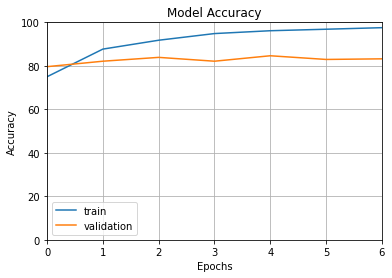

In [ ]:
fig1 = plt.gcf()
accuracy =resnet_model_history.history['accuracy'] + resnet_model_history2.history['accuracy']
val_accuracy = resnet_model_history.history['val_accuracy'] + resnet_model_history2.history['val_accuracy']

accuracy = [i*100 for i in accuracy]
val_accuracy = [i*100 for i in val_accuracy]

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.axis(ymin=0,ymax=100)
plt.axis(xmin=0,xmax=len(accuracy))
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
results = resnet_model.evaluate(test_data)
print("Test Accuracy:", results[1])

50/50 [==============================] - 86s 2s/step - loss: 0.6329 - accuracy: 0.8513
Test Accuracy: 0.8512658476829529
